### Bond Fluctuation Model

Bond vector set: 
$B=P\pm\left(\begin{array}{c}
2\\
0\\
0
\end{array}\right)\bigcup P\pm\left(\begin{array}{c}
2\\
1\\
0
\end{array}\right)\bigcup P\pm\left(\begin{array}{c}
2\\
1\\
1
\end{array}\right)\bigcup P\pm\left(\begin{array}{c}
2\\
2\\
1
\end{array}\right)\bigcup P\pm\left(\begin{array}{c}
3\\
0\\
0
\end{array}\right)\bigcup P\pm\left(\begin{array}{c}
3\\
1\\
0
\end{array}\right)$

Lattice occupation: $\vec{r}
+\left(\begin{array}{c}1\\ 0\\ 0 \end{array}\right)
+\left(\begin{array}{c}0\\ 1\\ 0 \end{array}\right)
+\left(\begin{array}{c}0\\ 0\\ 1 \end{array}\right)
+\left(\begin{array}{c}1\\ 1\\ 0 \end{array}\right)
+\left(\begin{array}{c}1\\ 0\\ 1 \end{array}\right)
+\left(\begin{array}{c}0\\ 1\\ 1 \end{array}\right)
+\left(\begin{array}{c}1\\ 1\\ 1 \end{array}\right)$

In [24]:
%pylab notebook
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [117]:
class monomer:
    ''' monomer class with unique index, containing the coordinates, bondpartners and attributes of a single BFM monomer '''
    def __init__(self, idx_, coords_, attributes_, bonds_ = []):
        ''' setting properties of monomer:
        idx: unique index (int),
        coords: d-dimensional coordinates (np.array),
        attributes: dict of properties (python dict),
        bonds: list of neigbor indizees (np.array)'''
        self.idx = idx_
        self.coords = coords_
        self.attributes = attributes_
        self.bonds = bonds_
        

class BFMSimulator:
    ''' class providing utilities for 3D BFM simulations:
    monomer container, bondset, move and apply function '''
    def __init__(self, box_, periodicity_):
        ''' setting up simulation box:
        box = [boxX, boxY, boxZ] (python list of int),
        periodicity = [pX, pY, pZ] (python list of bools), True = is periodic, False = wall
        ... and setup:
        empty molecules as empty list,
        empty lattice (boxX*boxY*boxZ) with 0 as initial value (np.array),
        list of moves (python list)'''
        self.boxX, self.boxY, self.boxZ = box_
        self.pX, self.pY, self.pZ = periodicity_
        self.molecules = []
        self.lattice = np.zeros((self.boxX,self.boxY,self.boxZ))
        self.moves = [(1,0,0),(-1,0,0),(0,1,0),(0,-1,0),(0,0,1),(0,0,-1)]
        self.Nmoves = len(self.moves)
        
    def connectMonomers(self, idx1, idx2):
        ''' connect two monomers in molecules by index '''
        self.molecules[idx1].bonds.append(idx2)
        self.molecules[idx2].bonds.append(idx1)
        
    def addMonomer(self, coords, attributes):
        ''' add new monomer at the end of molecules '''
        newIdx = len(self.molecules)
        self.molecules.append(monomer(newIdx ,coords, attributes,[]))
        
    def plotConfig(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        colorList = ["green","red"]
        
        myX = np.array([x.coords[0] for x in self.molecules])
        myY = np.array([x.coords[1] for x in self.molecules])
        myZ = np.array([x.coords[2] for x in self.molecules])
        
        mX, mY, mZ = [np.array(()),np.array(()),np.array(())]
        print(mX)
        for m in self.molecules:
            if (m.idx + 1) in m.bonds:
                mX = np.append(mX,myX[m.idx])
                mY = np.append(mY,myY[m.idx])
                mZ = np.append(mZ,myZ[m.idx])
            else:
                mX = np.append(mX,myX[m.idx])
                mY = np.append(mY,myY[m.idx])
                mZ = np.append(mZ,myZ[m.idx])
                ax.plot(mX,mY,mZ)
                mX, mY, mZ = [np.array(()),np.array(()),np.array(())]
            
        #ax.plot(myX,myY,myZ)
        
        myFixed = [x.attributes["fixed"] for x in self.molecules]
        myColors = [colorList[int(c)] for c in myFixed ]
        ax.scatter(myX,myY,myZ, c=myColors)
        
        ax.set_xlim3d(0, self.boxX)
        ax.set_ylim3d(0, self.boxY)
        ax.set_zlim3d(0, self.boxZ)
        fig.show()
    
    def singleMoveCheck(self, idx, direction):
        ''' apply the move checks for monomer with index idx:
        takes monomer id and key of move direction [0,self.Nmoves)
        check the attribute fixed,
        check new bonds, check lattice, check boundaries'''
        # check 
        if (self.monomer.attributes["fixed"] == True):
            return False
        # get new position
        newPos = self.monomer[idx].coords + self.moves[direction]
        x, y, z = newPos
        
        # check boundaries: 
        if not self.pX:
            if x == 0 or x == (self.boxX-1):
                return False
        if not self.pY:
            if y == 0 or y == (self.boxY-1):
                return False
        if not self.pZ:
            if z == 0 or z == (self.boxZ-1):
                return False
        
        #if ( self.lattice[newPos])
        
    
    
    
        

<IPython.core.display.Javascript object>


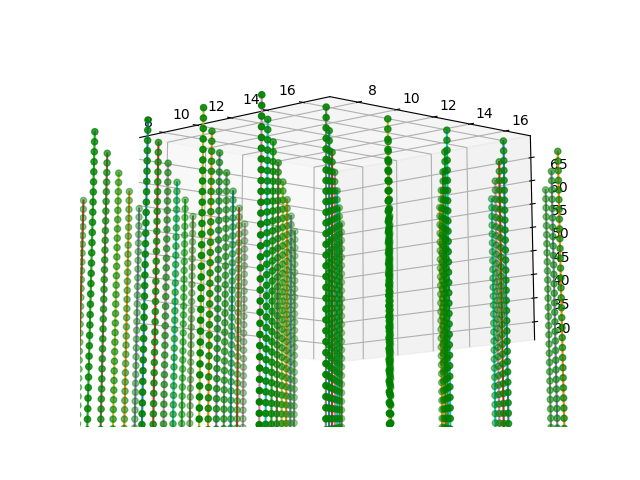

[]


In [119]:
# grafting densities 1/9, 1/16, 1/25
sigmaInv = 9
N = 32
# ketten array csp = 8x8
nChainsPerDirection = 8
distanceInDirection = int(np.sqrt(sigmaInv))
distanceInZ = 2

myBoxXY = nChainsPerDirection*distanceInDirection
hugo = BFMSimulator( [myBoxXY,myBoxXY,N*3], [True, True, False] )

for dx in range(nChainsPerDirection):
    for dy in range(nChainsPerDirection):
        for z in range(N):
            coords = np.array([dx*distanceInDirection,dy*distanceInDirection,z*distanceInZ])
            if (z==0):
                attr = {"fixed": True}
            else:
                attr = {"fixed": False}
            hugo.addMonomer(coords,attr)
            if not z==0:
                hugo.connectMonomers(len(hugo.molecules)-2,len(hugo.molecules)-1)
# check config
hugo.plotConfig()